#MARTIN ARDILA: 202311973

Se ve a implementar una simulacion de marcha aleatoria para un numero N grande de pasos. Se quiere comprobar que la distribucion que sale de contar dichos pasos converge a una distribucion Gaussiana.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#FUNCION DE LA MARCHA ALEATORIA

N: cantidad de pasos
M: cantidad de simulaciones que permitimos

In [2]:
def random_walk_1D(N):
    steps = np.random.choice([-1, 1], size=N)
    positions = np.cumsum(steps)
    return positions

En esta grafica puedo visualizar como estan variando los pasos con el output de la función random_walk_1D(), moviendose en un rango de 1 a N+1.

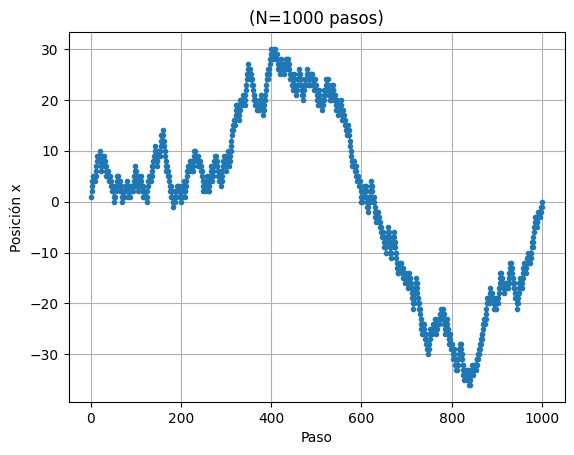

In [3]:
N = 1000
traj = random_walk_1D(N)

plt.plot(range(1, N+1), traj, marker="o", markersize=3, linewidth=1)
plt.xlabel("Paso")
plt.ylabel("Posición x")
plt.title(f"(N={N} pasos)")
plt.grid(True)
plt.show()

#HISTOGRAMA DE LA SIMULACIÓN Y APROXIMACIÓN GAUSSIANA

Simplemente va a depender de N: cantidad de pasos y M: cantidad de simulaciones. Se nota que va a converger cuando N y M son muy grandes, esto se da por la convergencia en el teorema de Límite central. La ley de probabilidad

$$
P(x) \approx \frac{1}{\sqrt{2\pi a^2 N}} \,
\exp\!\left(-\frac{x^2}{2 a^2 N}\right)
$$

confirma que cuando tomamos el limite se cumple el teorema, y es justamente lo que se va a comparar en la siguiente función.



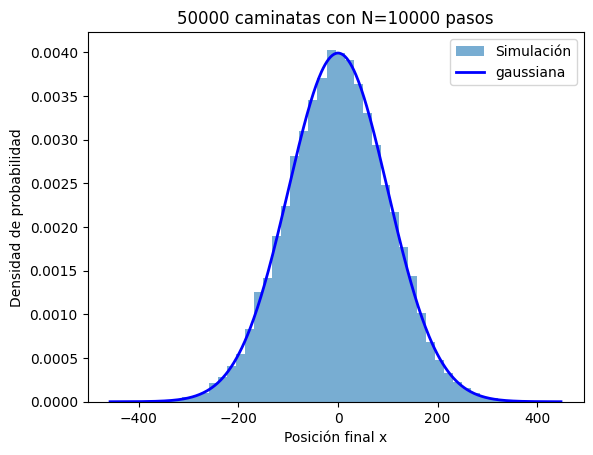

In [9]:
def simulate_walks(N, M):
    final_positions = np.array([random_walk_1D(N)[-1] for i in range(M)])

    plt.hist(final_positions, bins=50, density=True, alpha=0.6, label="Simulación")


    mu = 0
    sigma = np.sqrt(N)
    x = np.linspace(min(final_positions), max(final_positions), 500)
    plt.plot(x, norm.pdf(x, mu, sigma), "blue", lw=2, label="gaussiana")

    plt.xlabel("Posición final x")
    plt.ylabel("Densidad de probabilidad")
    plt.title(f"{M} caminatas con N={N} pasos")
    plt.legend()
    plt.show()

simulate_walks(10000, 50000)

#COMPROBAR QUE  $$ \langle x^2 \rangle = N a^2 $$



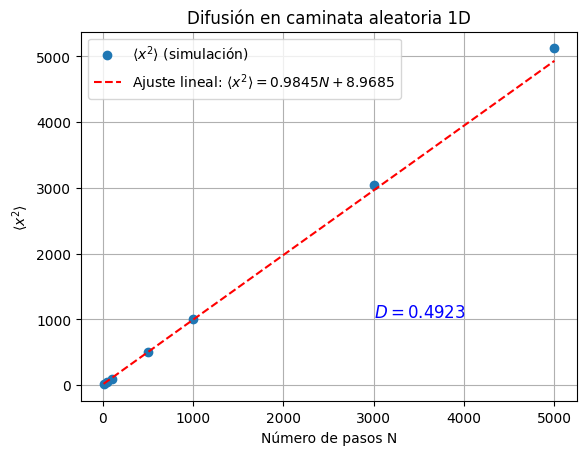

In [19]:
def diffusion(N_values, M=5000):
    mean_x = []
    mean_x2 = []

    for N in N_values:
        final_positions = [random_walk_1D(N)[-1] for i in range(M)]
        final_positions = np.array(final_positions)

        mean_x.append(np.mean(final_positions))       # ⟨x⟩
        mean_x2.append(np.mean(final_positions**2))   # ⟨x^2⟩

    return np.array(mean_x), np.array(mean_x2)


N_values = np.array([10, 50, 100, 500, 1000, 3000, 5000])
mean_x, mean_x2 = diffusion(N_values, M=10000)


#haciendo regresion lineal y probando en la grafica se nota que:
coef = np.polyfit(N_values, mean_x2, 1)
m, b = coef
D_num = m / 2

plt.plot(N_values, mean_x2, "o", label=r"$\langle x^2 \rangle$ (simulación)")
plt.plot(N_values, np.polyval(coef, N_values), "r--",
         label=fr"Ajuste lineal: $\langle x^2 \rangle = {m:.4f}N + {b:.4f}$")

plt.xlabel("Número de pasos N")
plt.ylabel(r"$\langle x^2 \rangle$")
plt.title("Difusión en caminata aleatoria 1D")
plt.grid(True)
plt.legend()
plt.text(0.6*max(N_values), 0.2*max(mean_x2),
         fr"$D = {D_num:.4f}$", fontsize=12, color="blue")



plt.show()

Note que con el ajuste lineal implementado se da uno cuenta que
$$D = m/2$$

lo cual coincide con la teoría pues en 1D se tenia que en difusión:

\begin{equation}
\langle x^2 \rangle = 2 D t
\end{equation}

Pero tambien:
\begin{equation}
\langle x^2 \rangle = a^2 N
\end{equation}

Igualando y despejando

\begin{equation}
      D^2  = \frac{a^2}{2}
\end{equation}

Es decir que numericamente se ve que $$a^2 ≈ m$$


In [24]:
promedios_x = []
promedios_x2 = []


for N in N_values:
    posiciones_finales = []
    for _ in range(M):
        posiciones = random_walk_1D(N)
        posiciones_finales.append(posiciones[-1])
    posiciones_finales = np.array(posiciones_finales)
    # <x>
    promedios_x.append(np.mean(posiciones_finales))
    # <x^2>
    promedios_x2.append(np.mean(posiciones_finales**2))

print(f"{'N':>8} {'<x>':>15} {'<x^2>':>15}")
print("-"*40)
for N, mx, mx2 in zip(N_values, promedios_x, promedios_x2):
    print(f"{N:8d} {mx:15.6f} {mx2:15.6f}")

       N             <x>           <x^2>
----------------------------------------
       1       -0.000080        1.000000
       5       -0.012400        4.994240
      10       -0.012340        9.958840
      50        0.020740       50.057960
      75       -0.002300       74.842000
     100        0.005000      100.393600
     250        0.033820      249.914200
     500        0.110620      499.723880
     750        0.050420      755.341560
    1000        0.056600      999.630080
    1250       -0.064040     1244.176560
    2500       -0.020800     2499.383120
